# Mounting Google Drive

This code cell imports the necessary module 'drive' from the 'google.colab' library to enable access to Google Drive within the Colab environment. It then mounts the Google Drive to the Colab notebook by calling the 'drive.mount()' function with the path '/content/drive'. This step is crucial as it allows you to access and work with files stored in your Google Drive directly from the Colab notebook.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Installing the 'transformers' Library

This code cell uses the 'pip' package manager to install the 'transformers' library into the Colab environment. The 'transformers' library is a popular open-source library developed by Hugging Face, which provides a wide range of pre-trained models for natural language processing (NLP) tasks, such as text classification, language translation, and question-answering.

By running this cell, you ensure that the 'transformers' library is available in your Colab notebook, enabling you to leverage its powerful capabilities for NLP tasks. After installation, you can import specific modules or classes from the 'transformers' library and use them in your code for tasks like text generation, feature extraction, and fine-tuning pre-trained models on custom datasets.

In [ ]:
!pip install transformers
!pip install mlflow==2.5.0

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.6/7.6 MB 80.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 98.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 67.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.2/18.2 MB 58.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 83.5/83.5 kB 7.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 188.6/188.6 kB 16.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 226.0/226.0 kB 17.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 148.1/148.1 kB 13.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.5/79.5 kB 8.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.7/78.7 kB 7.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 5.7 MB/s eta 0:00:00
  Created wheel for databricks-cli: filename=databricks_cli-0.17.7-py3-none-an

In [ ]:
!pip install accelerate

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 251.2/251.2 kB 5.9 MB/s eta 0:00:00


# Importing Libraries for Language Modeling

In this code cell, several essential libraries and classes from the 'transformers' package are imported. These libraries are designed to facilitate language modeling tasks using pre-trained models and to streamline the training and evaluation process.

In [ ]:
from transformers import GPT2LMHeadModel, GPT2Tokenizer, GPT2Config
from transformers import TextDataset, DataCollatorForLanguageModeling
from transformers import Trainer, TrainingArguments
from transformers import AutoTokenizer, AutoModelForCausalLM
from transformers import pipeline

# Fine-tuning GPT-2 for Language Generation

This code defines a function named 'fine_tune_gpt2' that performs the fine-tuning process for the GPT-2 language model on a custom dataset. Fine-tuning involves taking a pre-trained GPT-2 model and training it on domain-specific data to adapt it to the specific language patterns and characteristics of that data. Fine-tuning is useful when you have a specific text generation task in mind, such as creative writing, code generation, or dialogue generation.

The function takes three input parameters:

* model_name (str):
The name or identifier of the pre-trained GPT-2 model to use as a starting point for fine-tuning. Examples of model names are 'gpt2', 'gpt2-medium', or 'gpt2-large'. This parameter allows you to choose the model size and capacity according to your task requirements.

* train_file (str):
The path to the training file containing the text data for fine-tuning the model. The function loads this text file and uses it to create a training dataset.

* output_dir (str):
The directory where the fine-tuned model and tokenizer will be saved after training. This parameter specifies the location where the updated model will be stored for future use.

The function performs the following steps:

* Load GPT-2 model and tokenizer:
The function loads the pre-trained GPT-2 model specified by model_name and its corresponding tokenizer. The tokenizer is responsible for tokenizing the text data, while the model contains the architecture and parameters necessary for language modeling.

* Load training dataset:
The function creates a 'TextDataset' from the provided train_file, using the loaded tokenizer and setting a 'block_size' of 128. The 'block_size' determines the maximum length of input sequences during training and can be adjusted based on memory constraints and task requirements.

* Create data collator for language modeling:
A 'DataCollatorForLanguageModeling' is created using the loaded tokenizer. This data collator handles batching and padding of the training data during the fine-tuning process.

* Set training arguments:
The function defines the 'TrainingArguments' object to configure the training process. It specifies various training options, such as the number of epochs ('num_train_epochs'), batch size per device ('per_device_train_batch_size'), saving model checkpoints after a certain number of steps ('save_steps'), and limiting the total number of saved checkpoints ('save_total_limit').

* Train the model:
The 'Trainer' object is initialized with the loaded model, training arguments, data collator, and training dataset. It then performs the fine-tuning process on the training data using the specified GPT-2 model.

* Save the fine-tuned model:
After training, the fine-tuned GPT-2 model and its tokenizer are saved in the specified output_dir for later use.

In [ ]:
def fine_tune_gpt2(model_name, train_file, output_dir):
    # Load GPT-2 model and tokenizer
    model = GPT2LMHeadModel.from_pretrained(model_name)
    tokenizer = GPT2Tokenizer.from_pretrained(model_name)

# Load training dataset
    train_dataset = TextDataset(
        tokenizer=tokenizer,
        file_path=train_file,
        block_size=128)
    # Create data collator for language modeling
    data_collator = DataCollatorForLanguageModeling(
        tokenizer=tokenizer, mlm=False)
    # Set training arguments
    training_args = TrainingArguments(
        output_dir=output_dir,
        overwrite_output_dir=True,
        num_train_epochs=10,
        per_device_train_batch_size=4,
        save_steps=10_000,
        save_total_limit=10,
    )
    # Train the model
    trainer = Trainer(
        model=model,
        args=training_args,
        data_collator=data_collator,
        train_dataset=train_dataset,
    )
    trainer.train()
    # Save the fine-tuned model
    model.save_pretrained(output_dir)
    tokenizer.save_pretrained(output_dir)

# Fine-tuning GPT-2 on Abstracts Dataset

In this code cell, the previously defined 'fine_tune_gpt2' function is called to perform the fine-tuning process on the GPT-2 language model using a dataset of abstracts. The function is provided with specific parameters to customize the fine-tuning process for the 'gpt2' model.

# Loading the Fine-tuned GPT-2 Model and Tokenizer

In this code cell, the fine-tuned GPT-2 model and tokenizer are loaded for further use in text generation tasks. The fine-tuned model was previously trained on a dataset of titles, and now we are preparing to use it for generating titles based on the patterns it learned during fine-tuning.

# Text Generation Using Fine-tuned GPT-2 Model

In this code cell, a text generation pipeline is created using the fine-tuned GPT-2 model and tokenizer. The pipeline allows easy and quick generation of text based on provided prompts. The fine-tuned model, which was trained on titles, is now ready to generate new titles or text based on the patterns it learned during training.

In [ ]:
!pip install xformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 167.0/167.0 MB 4.7 MB/s eta 0:00:00


## Fine tune the model on new dataset (NLP  & LLMs) using and track the model using MLflow

In [ ]:
!pip install accelerate==0.22.0
!pip install transformers==4.32.0

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.5/7.5 MB 49.7 MB/s eta 0:00:00
  Attempting uninstall: transformers
    Found existing installation: transformers 4.33.0
    Uninstalling transformers-4.33.0:
      Successfully uninstalled transformers-4.33.0


In [ ]:
import mlflow
from mlflow.tracking import MlflowClient
from transformers import GPT2LMHeadModel, GPT2Tokenizer, TextDataset, DataCollatorForLanguageModeling, TrainingArguments, Trainer

def fine_tune_gpt2_with_MLflow(model_name, train_file, output_dir):
    # Load GPT-2 model and tokenizer
    model = GPT2LMHeadModel.from_pretrained(model_name)
    tokenizer = GPT2Tokenizer.from_pretrained(model_name)

    # Load training dataset
    train_dataset = TextDataset(
        tokenizer=tokenizer,
        file_path=train_file,
        block_size=128)
    # Create data collator for language modeling
    data_collator = DataCollatorForLanguageModeling(
        tokenizer=tokenizer, mlm=False)
    # Set training arguments
    training_args = TrainingArguments(
        output_dir=output_dir,
        overwrite_output_dir=True,
        num_train_epochs=10,
        per_device_train_batch_size=4,
        save_steps=10_000,
        save_total_limit=10,
    )

    # Set the MLflow project name
    project_name = "GPT2_Fine_Tuning_Project"

    # Start MLflow run with the specified project name
    with mlflow.start_run(run_name="FineTuningRun") as run:
        # Set the project name for the run
        mlflow.set_tag("mlflow.project.name", project_name)

        # Log model hyperparameters to MLflow
        mlflow.log_param("model_name", model_name)
        mlflow.log_param("train_file", train_file)
        mlflow.log_param("output_dir", output_dir)

        # Train the model
        trainer = Trainer(
            model=model,
            args=training_args,
            data_collator=data_collator,
            train_dataset=train_dataset,
        )
        trainer.train()

        # Log training metrics to MLflow
        mlflow.log_metrics(trainer.metrics)

        # Save the fine-tuned model
        model.save_pretrained(output_dir)
        tokenizer.save_pretrained(output_dir)

        # Log the model artifacts to MLflow
        mlflow.pytorch.log_model(trainer.model, "fine_tuned_model")


In [ ]:
!databricks configure --host https://community.cloud.databricks.com/

Username: younesmamma20@gmail.com
Password: 
Repeat for confirmation: 


In [ ]:
import mlflow
mlflow.set_tracking_uri("databricks")
mlflow.set_experiment("/Users/younesmamma20@gmail.com/GPT2-LLM-FineTuning")

<Experiment: artifact_location='dbfs:/databricks/mlflow-tracking/629941194954570', creation_time=1692578143595, experiment_id='629941194954570', last_update_time=1693752085755, lifecycle_stage='active', name='/Users/younesmamma20@gmail.com/GPT2-LLM-FineTuning', tags={'mlflow.experiment.sourceName': '/Users/younesmamma20@gmail.com/GPT2-LLM-FineTuning',
 'mlflow.experimentType': 'MLFLOW_EXPERIMENT',
 'mlflow.ownerEmail': 'younesmamma20@gmail.com',
 'mlflow.ownerId': '3473249436611650'}>

## Setting env for AWS account

In [ ]:
!pip install awscli

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.2/4.2 MB 16.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 548.2/548.2 kB 31.1 MB/s eta 0:00:00
  Attempting uninstall: rsa
    Found existing installation: rsa 4.9
    Uninstalling rsa-4.9:
      Successfully uninstalled rsa-4.9
  Attempting uninstall: docutils
    Found existing installation: docutils 0.18.1
    Uninstalling docutils-0.18.1:
      Successfully uninstalled docutils-0.18.1


In [ ]:
!pip install boto3

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 135.8/135.8 kB 2.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.2/11.2 MB 98.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.8/79.8 kB 8.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.1/143.1 kB 11.6 MB/s eta 0:00:00
  Attempting uninstall: urllib3
    Found existing installation: urllib3 2.0.4
    Uninstalling urllib3-2.0.4:
      Successfully uninstalled urllib3-2.0.4


In [ ]:
import boto3

AWS_ACCESS_KEY_ID = "<your-aws_key_id>"
AWS_SECRET_ACCESS_KEY = "<your_aws_secret_access_key>"
S3_BUCKET_NAME = 'myfreetrial'

def s3_client():
    return boto3.client('s3', aws_access_key_id=AWS_ACCESS_KEY_ID, aws_secret_access_key=AWS_SECRET_ACCESS_KEY)

def test_s3_bucket_exists(s3_client):
    # Check if the S3 bucket exists
    try:
        s3_client.head_bucket(Bucket=S3_BUCKET_NAME)
        print(f"S3 Bucket '{S3_BUCKET_NAME}' exists.")
    except Exception as e:
        print(f"Error: {e}")
        print(f"S3 Bucket '{S3_BUCKET_NAME}' does not exist.")

def test_s3_bucket_access(s3_client):
    # Check if you can list objects in the S3 bucket
    try:
        response = s3_client.list_objects_v2(Bucket=S3_BUCKET_NAME)
        if 'Contents' in response:
            print(f"Successfully accessed objects in S3 Bucket '{S3_BUCKET_NAME}'.")
        else:
            print(f"No objects found in S3 Bucket '{S3_BUCKET_NAME}'.")
    except Exception as e:
        print(f"Error: {e}")

if __name__ == "__main__":
    s3 = s3_client()
    test_s3_bucket_exists(s3)
    test_s3_bucket_access(s3)


S3 Bucket 'myfreetrial' exists.
Successfully accessed objects in S3 Bucket 'myfreetrial'.


In [ ]:
from tabulate import tabulate

def list_files_in_bucket(s3_client, bucket_name):
    file_info_list = []

    try:
        response = s3_client.list_objects_v2(Bucket=bucket_name)
        if 'Contents' in response:
            for obj in response['Contents']:
                file_info = {
                    'File': obj['Key'],
                    'Size (bytes)': obj['Size'],
                    'Last Modified': obj['LastModified'],
                    # Add more fields as needed
                }
                file_info_list.append(file_info)
        else:
            print(f"No objects found in S3 Bucket '{bucket_name}'.")
    except Exception as e:
        print(f"Error: {e}")

    return file_info_list

# Usage
S3_BUCKET_NAME = 'myfreetrial'
file_info_list = list_files_in_bucket(s3, S3_BUCKET_NAME)

# Print the file information in tabular format
headers = file_info_list[0].keys() if file_info_list else []
data = [file_info.values() for file_info in file_info_list]

if data:
    print(tabulate(data, headers, tablefmt="grid"))
else:
    print("No objects found in the S3 bucket.")


+---------------+----------------+---------------------------+
| File          |   Size (bytes) | Last Modified             |
+===============+================+===========================+
| qa_pairs.txt  |         291643 | 2023-09-03 11:22:40+00:00 |
+---------------+----------------+---------------------------+
| qa_pairs1.txt |         297708 | 2023-09-03 11:34:50+00:00 |
+---------------+----------------+---------------------------+
| qa_pairs2.txt |         449863 | 2023-09-03 11:43:19+00:00 |
+---------------+----------------+---------------------------+


In [ ]:
def download_file_from_bucket(s3_client, bucket_name, file_name):
    try:
        s3_client.download_file(bucket_name, file_name, file_name)  # Use the same file name for the local path
        print(f"Downloaded '{file_name}' from S3 Bucket '{bucket_name}' to current working directory.")
    except Exception as e:
        print(f"Error: {e}")

if __name__ == "__main__":
    s3 = s3_client()

    # Specify the file name you want to download from the S3 bucket
    file_name_to_download = 'qa_pairs2.txt'

    download_file_from_bucket(s3, S3_BUCKET_NAME, file_name_to_download)


Downloaded 'qa_pairs2.txt' from S3 Bucket 'myfreetrial' to current working directory.


In [ ]:

from transformers import GPT2LMHeadModel, GPT2Tokenizer, TextDataset, DataCollatorForLanguageModeling, TrainingArguments, Trainer
import mlflow


def fine_tune_gpt2_with_mlflow(model_name, train_file, experiment_id):
    # Start a new MLflow run
    with mlflow.start_run() as run:

        # Set the experiment ID


        # Log the parameters
        mlflow.log_param("model_name", model_name)
        mlflow.log_param("train_file", train_file)

        # Load GPT-2 model and tokenizer
        model = GPT2LMHeadModel.from_pretrained(model_name)
        tokenizer = GPT2Tokenizer.from_pretrained(model_name)

        # Load training dataset
        train_dataset = TextDataset(
            tokenizer=tokenizer,
            file_path=train_file,
            block_size=128)

        # Create data collator for language modeling
        data_collator = DataCollatorForLanguageModeling(
            tokenizer=tokenizer, mlm=False)

        # Set training arguments
        training_args = TrainingArguments(
            output_dir=mlflow.get_artifact_uri("output_model"),
            overwrite_output_dir=True,
            num_train_epochs=10,
            per_device_train_batch_size=4,
            save_steps=10_000,
            save_total_limit=10,
        )

        # Train the model
        trainer = Trainer(
            model=model,
            args=training_args,
            data_collator=data_collator,
            train_dataset=train_dataset,
        )
        training_output = trainer.train()

        # Save the fine-tuned model and tokenizer
        model.save_pretrained(training_args.output_dir)
        tokenizer.save_pretrained(training_args.output_dir)

        # Log training metrics
        mlflow.log_metrics(training_output.metrics)

        # Log the model and tokenizer as artifacts in Databricks DBFS
        mlflow.log_artifacts(training_args.output_dir, artifact_path="model_and_tokenizer")

        # Register the model and tokenizer as a single entity
        mlflow.pytorch.log_model(trainer.model, "fine_tuned_gpt2")

# Set the experiment ID
experiment_id = "629941194954570"

# Call the fine-tuning function
fine_tune_gpt2_with_mlflow("gpt2", "/content/qa_pairs2.txt", experiment_id)



/usr/local/lib/python3.10/dist-packages/transformers/data/datasets/language_modeling.py:53: FutureWarning: This dataset will be removed from the library soon, preprocessing should be handled with the 🤗 Datasets library. You can have a look at this example script for pointers: https://github.com/huggingface/transformers/blob/main/examples/pytorch/language-modeling/run_mlm.py
  warnings.warn(


Step,Training Loss
500,3.275700
1000,2.693400
1500,2.392600


2023/09/03 14:47:43 WARNING mlflow.models.model: Model logged without a signature. Signatures will be required for upcoming model registry features as they validate model inputs and denote the expected schema of model outputs. Please visit https://www.mlflow.org/docs/2.5.0/models.html#set-signature-on-logged-model for instructions on setting a model signature on your logged model.
2023/09/03 14:47:44 WARNING mlflow.utils.requirements_utils: Found torch version (2.0.1+cu118) contains a local version label (+cu118). MLflow logged a pip requirement for this package as 'torch==2.0.1' without the local version label to make it installable from PyPI. To specify pip requirements containing local version labels, please use `conda_env` or `pip_requirements`.
2023/09/03 14:47:53 WARNING mlflow.utils.environment: Encountered an unexpected error while inferring pip requirements (model URI: /tmp/tmp6l9rqnp6/model/data, flavor: pytorch), fall back to return ['torch==2.0.1', 'cloudpickle==2.2.1']. Se

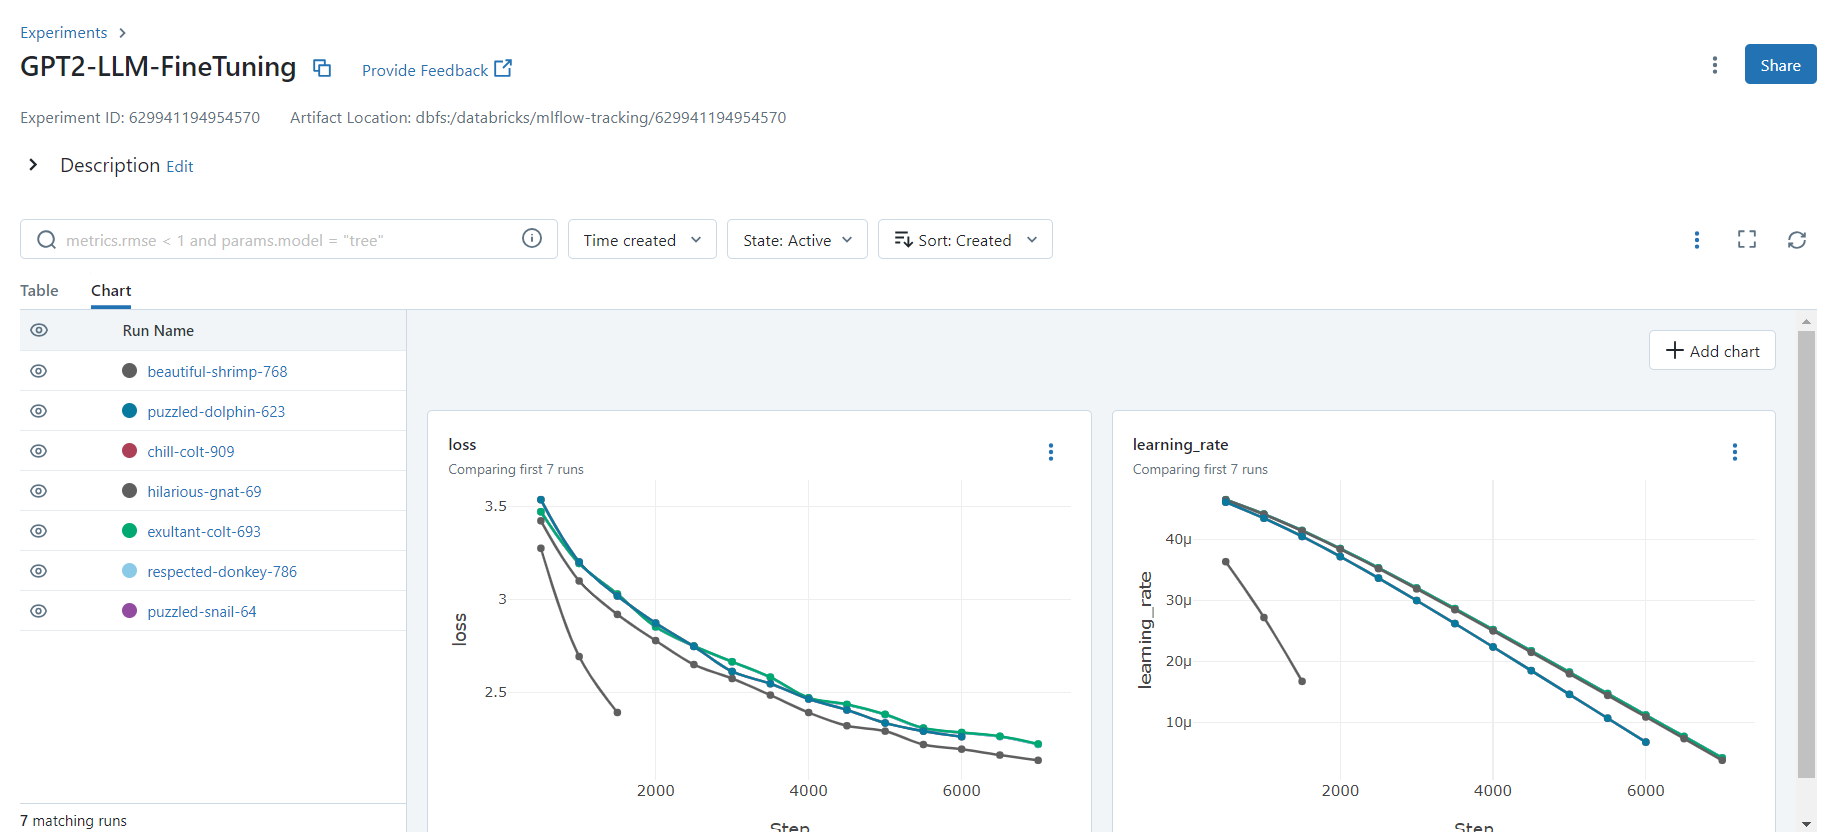

In [ ]:
import mlflow
import os

# Set the tracking server URI if necessary
# mlflow.set_tracking_uri("http://your-tracking-server-uri")

# Define the run ID for which you want to access artifacts
run_id = '6979d4e45806439f9dc9589a29c85cbc'
artifact_subfolder = 'model_and_tokenizer'  # Specify the subfolder you're interested in

# Create an MLflow client
client = mlflow.tracking.MlflowClient()

# Get the run object
run = client.get_run(run_id)

# Get the base artifacts URI for the run
base_artifacts_uri = run.info.artifact_uri

# Define the path to the artifact subfolder
artifact_subfolder_path = os.path.join(base_artifacts_uri, artifact_subfolder)

# List and print the contents of the artifact subfolder
artifact_contents = client.list_artifacts(run_id, path=artifact_subfolder)
if artifact_contents:
    print(f"Contents of '{artifact_subfolder}':")
    for artifact in artifact_contents:
        artifact_relative_path = artifact.path  # Get the artifact's relative path
        artifact_path = os.path.join(artifact_subfolder_path, artifact_relative_path)

        # Download the artifact to the current working directory
        local_path = client.download_artifacts(run_id, artifact_relative_path, dst_path=os.getcwd())

        # Print the local path of the downloaded artifact
        print(f"Downloaded to: {local_path}")
else:
    print(f"No artifacts found in '{artifact_subfolder}'.")


Contents of 'model_and_tokenizer':
Downloaded to: /content/model_and_tokenizer/config.json
Downloaded to: /content/model_and_tokenizer/generation_config.json
Downloaded to: /content/model_and_tokenizer/merges.txt
Downloaded to: /content/model_and_tokenizer/pytorch_model.bin
Downloaded to: /content/model_and_tokenizer/special_tokens_map.json
Downloaded to: /content/model_and_tokenizer/tokenizer_config.json
Downloaded to: /content/model_and_tokenizer/vocab.json
Downloaded to: /content/model_and_tokenizer/runs


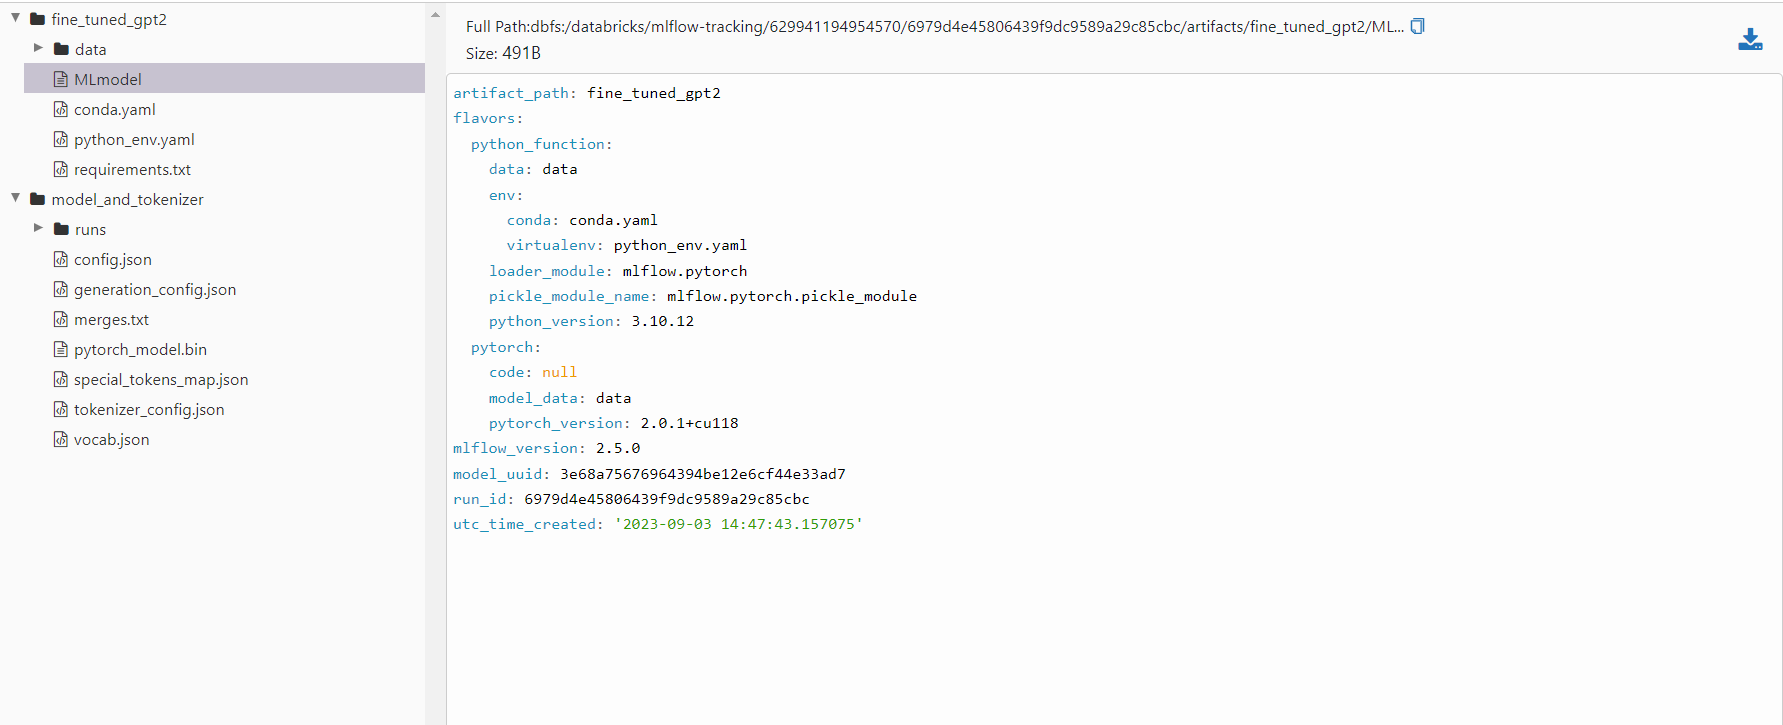

In [ ]:

tokenizer = AutoTokenizer.from_pretrained("/content/model_and_tokenizer")
model_config = GPT2Config.from_pretrained("/content/model_and_tokenizer/config.json")
model = AutoModelForCausalLM.from_pretrained("/content/model_and_tokenizer/pytorch_model.bin", config=model_config)


In [ ]:

# Create a text generation pipeline
text_generator = pipeline("text-generation", model=model, tokenizer=tokenizer)

# Generate text using the fine-tuned model
prompt = "Q: Can you give me an abstract for my research paper with the Title:BIG DATA and Large Language Models?"
generated_text = text_generator(prompt, max_length=200, num_return_sequences=1)

# Print the generated text
print(generated_text[0]['generated_text'])


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Q: Can you give me an abstract for my research paper with the Title:BIG DATA and Large Language Models?
A: Abstract:  Multi-agent, multi-language modeling has been advancing for a long time,
but multi-language models that combine speech and spoken data have
shown limited success. While speech models can theoretically be adapted to a wide range
of machine words, the limited number of real-world examples of spoken
datasets is a drawback. To address this challenge, this paper proposes
a novel approach that combines multi-agent, multimodal speech and spoken
datasets in the form of word embedding. Through learning a novel dictionary
and/or articulation technique, we incorporate two different intransitively
ext Tigran-Tibran-Medial colloquial sentences as auxiliary
auxiliary representations into a single speech model. Through an intransitively
formatted dictionary, each sentence is introduced as auxiliary



## Gradio UI for Abstract Assistant

In [ ]:
!!pip install gradio

['Collecting gradio',
 '  Downloading gradio-3.42.0-py3-none-any.whl (20.1 MB)',
 '\x1b[?25l     \x1b━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━\x1b \x1b0.0/20.1 MB\x1b \x1b?\x1b eta \x1b-:--:--\x1b',
 '\x1b[2K     \x1b━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━\x1b \x1b0.1/20.1 MB\x1b \x1b2.5 MB/s\x1b eta \x1b0:00:08\x1b',
 '\x1b[2K     \x1b━━━━━━\x1b\x1b╺\x1b\x1b━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━\x1b \x1b3.1/20.1 MB\x1b \x1b43.7 MB/s\x1b eta \x1b0:00:01\x1b',
 '\x1b[2K     \x1b━━━━━━━━━━━━━━━\x1b\x1b╸\x1b\x1b━━━━━━━━━━━━━━━━━━━━━━━━\x1b \x1b8.0/20.1 MB\x1b \x1b75.6 MB/s\x1b eta \x1b0:00:01\x1b',
 '\x1b[2K     \x1b━━━━━━━━━━━━━━━━━━━━━━━━━\x1b\x1b╸\x1b\x1b━━━━━━━━━━━━━\x1b \x1b13.2/20.1 MB\x1b \x1b143.9 MB/s\x1b eta \x1b0:00:01\x1b',
 '\x1b[2K     \x1b━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━\x1b\x1b╸\x1b\x1b━━\x1b \x1b19.0/20.1 MB\x1b \x1b156.8 MB/s\x1b eta \x1b0:00:01\x1b',
 '\x1b[2K     \x1b━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━\x1b\x1b╸\x1b \x1b20.1/20.1 MB\x1b \x1b151.0 MB/s\x1b eta \x1b0:00

In [ ]:
import gradio as gr
from transformers import AutoTokenizer, AutoModelForCausalLM, GPT2Config, pipeline

# Load the fine-tuned GPT-2 model and tokenizer
tokenizer = AutoTokenizer.from_pretrained("./model_and_tokenizer/")
model_config = GPT2Config.from_pretrained("./model_and_tokenizer/config.json")
model = AutoModelForCausalLM.from_pretrained("./model_and_tokenizer/pytorch_model.bin", config=model_config)
text_generator = pipeline("text-generation", model=model, tokenizer=tokenizer)

def generate_article(prompt):
    full_prompt = f"Q: Can you give me an abstract for my research paper with the Title:{prompt}"
    generated_text = text_generator(full_prompt, max_length=200, num_return_sequences=1)
    generated_answer = generated_text[0]['generated_text']
    return generated_answer

# Define Gradio interface
gr.Interface(
    fn=generate_article,
    inputs=gr.inputs.Textbox(label="User Input"),
    outputs=gr.outputs.Textbox(label="Generated Answer"),
    live=True,
    title="🦜️ GPT-Articles Assistant",
    description="Generate research article abstracts based on user prompts.",
    theme="default"
).launch(share=True)


<ipython-input-8-6b79b022d169>:19: GradioDeprecationWarning: Usage of gradio.inputs is deprecated, and will not be supported in the future, please import your component from gradio.components
  inputs=gr.inputs.Textbox(label="User Input"),
<ipython-input-8-6b79b022d169>:19: GradioDeprecationWarning: `optional` parameter is deprecated, and it has no effect
  inputs=gr.inputs.Textbox(label="User Input"),
<ipython-input-8-6b79b022d169>:19: GradioDeprecationWarning: `numeric` parameter is deprecated, and it has no effect
  inputs=gr.inputs.Textbox(label="User Input"),
<ipython-input-8-6b79b022d169>:20: GradioDeprecationWarning: Usage of gradio.outputs is deprecated, and will not be supported in the future, please import your components from gradio.components
  outputs=gr.outputs.Textbox(label="Generated Answer"),


Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
Running on public URL: https://2a3bfac68ca60253ce.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)
